# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
from string import punctuation
s_words = list(punctuation) + stopwords.words('english')

In [4]:
sia = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [5]:
words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [6]:
pos_words = []
neg_words = []

for word in words:
    score = sia.polarity_scores(word)
    comp = score.get('compound')
    if comp > 0:
        pos_words.append(word)
    elif comp < 0:
        neg_words.append(word)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

Text(0, 0.5, '')

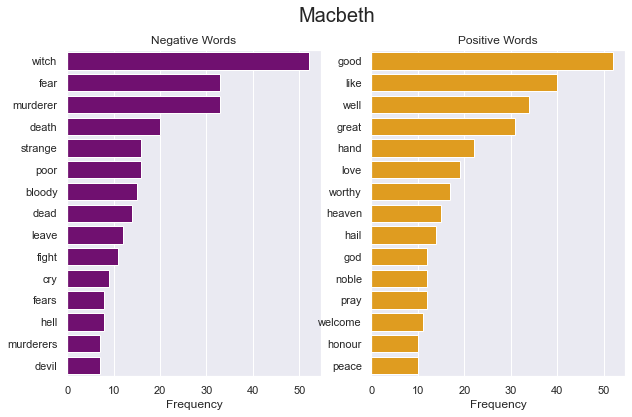

In [22]:
# Code:

pos_top = nltk.FreqDist(pos_words).most_common(15)
neg_top = nltk.FreqDist(neg_words).most_common(15)

pos_top = {i[0]:i[1] for i in pos_top}
neg_top = {i[0]:i[1] for i in neg_top}

p_df = pd.DataFrame(pos_top, index=['Frequency']).T
n_df = pd.DataFrame(neg_top, index=['Frequency']).T

p_df = p_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)
n_df = n_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle('Macbeth', fontsize=20)

sns.barplot(ax=axes[1], x='Frequency', y='Word', data=p_df, color='orange')
axes[1].set_title('Positive Words')
axes[1].set_ylabel('')

sns.barplot(ax=axes[0], x='Frequency', y='Word', data=n_df, color='purple')
axes[0].set_title('Negative Words') 
axes[0].set_ylabel('')


### Comments:

In the given plot, we see that the words murderer and murderers are combined, whereas the plot generated above shows them to be counted separately

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [20]:
# Code:

words = word_tokenize(macbeth_string)

words = [i for i in words if i not in s_words]

pos_words = []
neg_words = []

for word in words:
    score = sia.polarity_scores(word)
    comp = score.get('compound')
    if comp > 0:
        pos_words.append(word)
    elif comp < 0:
        neg_words.append(word)

Text(0, 0.5, '')

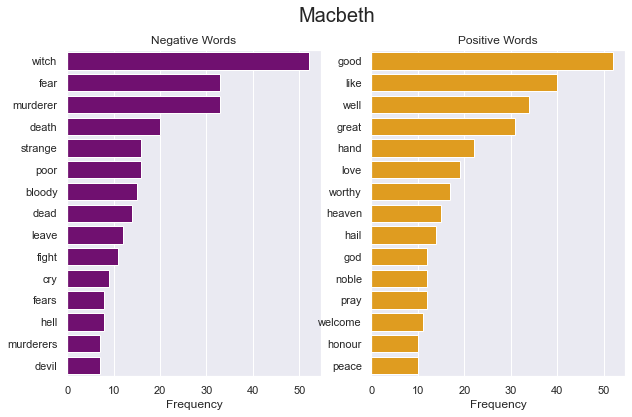

In [21]:
pos_top = nltk.FreqDist(pos_words).most_common(15)
neg_top = nltk.FreqDist(neg_words).most_common(15)

pos_top = {i[0]:i[1] for i in pos_top}
neg_top = {i[0]:i[1] for i in neg_top}

p_df = pd.DataFrame(pos_top, index=['Frequency']).T
n_df = pd.DataFrame(neg_top, index=['Frequency']).T

p_df = p_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)
n_df = n_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle('Macbeth', fontsize=20)

sns.barplot(ax=axes[1], x='Frequency', y='Word', data=p_df, color='orange')
axes[1].set_title('Positive Words')
axes[1].set_ylabel('')

sns.barplot(ax=axes[0], x='Frequency', y='Word', data=n_df, color='purple')
axes[0].set_title('Negative Words') 
axes[0].set_ylabel('')

### Comments:

Not much changed when removing stopwords. We are looking at individual words instead of scoring Macbeth overall, so the difference between removing stopwords, which are usually neutral, and leaving them in.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

Text(0, 0.5, '')

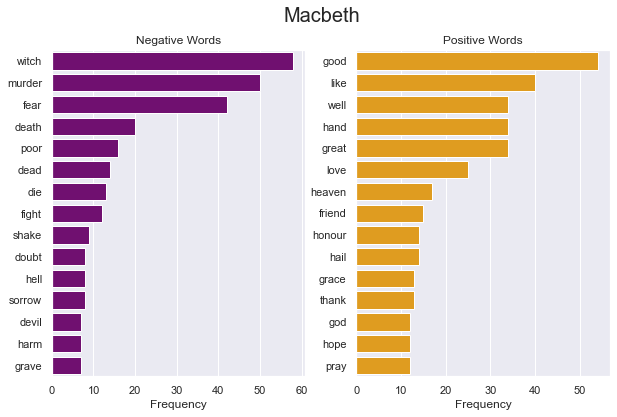

In [23]:
# Code:

from nltk.stem.porter import PorterStemmer

words = word_tokenize(macbeth_string)

words = [i for i in words if i not in s_words]

words_stemmed = [PorterStemmer().stem(i) for i in words]

pos_words = []
neg_words = []

for word in words_stemmed:
    score = sia.polarity_scores(word)
    comp = score.get('compound')
    if comp > 0:
        pos_words.append(word)
    elif comp < 0:
        neg_words.append(word)

pos_top = nltk.FreqDist(pos_words).most_common(15)
neg_top = nltk.FreqDist(neg_words).most_common(15)

pos_top = {i[0]:i[1] for i in pos_top}
neg_top = {i[0]:i[1] for i in neg_top}

p_df = pd.DataFrame(pos_top, index=['Frequency']).T
n_df = pd.DataFrame(neg_top, index=['Frequency']).T

p_df = p_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)
n_df = n_df.reset_index().rename(columns={'index':'Word'}).sort_values('Frequency', ascending=False)

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle('Macbeth', fontsize=20)

sns.barplot(ax=axes[1], x='Frequency', y='Word', data=p_df, color='orange')
axes[1].set_title('Positive Words')
axes[1].set_ylabel('')

sns.barplot(ax=axes[0], x='Frequency', y='Word', data=n_df, color='purple')
axes[0].set_title('Negative Words') 
axes[0].set_ylabel('')

### Comments:

When we remove stop words and stem the rest, we see that our results are more similar to the original plot compared to the first plot generated.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

In [85]:
scene_scores = pd.DataFrame(columns=['Scene','Score'])

In [86]:
count = 0
scene = 1
for s in r_j_scenes:
    words = word_tokenize(s)
    words = [i for i in words if i not in s_words]
    words_stemmed = [PorterStemmer().stem(i) for i in words]
    c_score = sum([sia.polarity_scores(i).get('compound') for i in words_stemmed])
    scene_scores.loc[count] = [scene, c_score]
    scene += 1
    count += 1

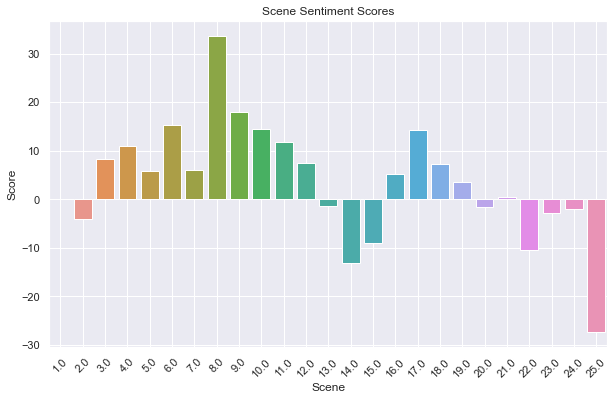

In [95]:
# Code:

sns.set_theme()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Scene', y='Score', data=scene_scores)
ax.grid(True)

ax.set_title('Scene Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

In [100]:
# Code:

scene_scores = pd.DataFrame(columns=['Scene','Score'])

count = 0
scene = 1
for s in r_j_scenes:
    dif_score = 0
    words = word_tokenize(s)
    words = [i for i in words if i not in s_words]
    words_stemmed = [PorterStemmer().stem(i) for i in words]
    c_score = [sia.polarity_scores(i).get('compound') for i in words_stemmed]
    for i in c_score:
        if i > 0:
            dif_score += 1
        elif i < 0:
            dif_score -= 1
    scene_scores.loc[count] = [scene, dif_score]
    scene += 1
    count += 1

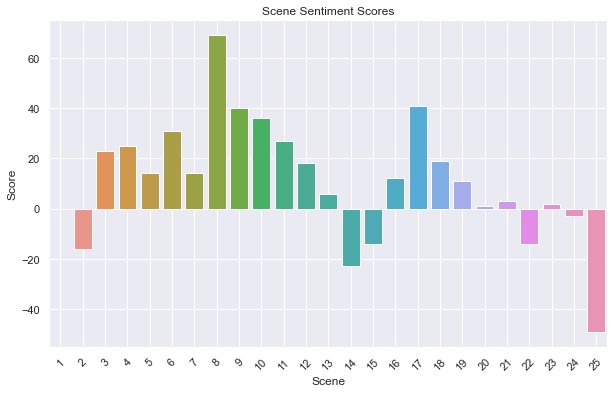

In [102]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Scene', y='Score', data=scene_scores)
ax.grid(True)

ax.set_title('Scene Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [103]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [104]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [105]:
# Code:

scene_scores = pd.DataFrame(columns=['Scene','Score'])

count = 0
scene = 1

for s in r_j_scenes:
    dif_score = 0
    words = word_tokenize(s)
    words = [i for i in words if i not in s_words]
    words_stemmed = [PorterStemmer().stem(i) for i in words]
    for w in words_stemmed:
        if w in positive_words:
            dif_score += 1
        elif w in negative_words:
            dif_score -= 1
    scene_scores.loc[count] = [scene, dif_score]
    scene += 1
    count += 1

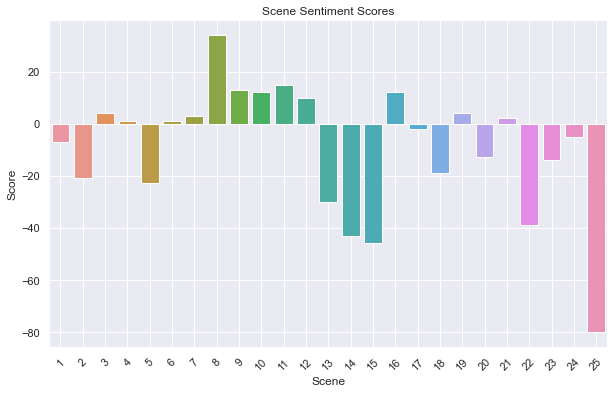

In [107]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Scene', y='Score', data=scene_scores)
ax.grid(True)

ax.set_title('Scene Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

### Make this a markdown cell for your comments:

Here we see that the with this method Romeo and Juliet is less positive that the previous methods.  

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [ ]:
scene_scores = pd.DataFrame(columns=['Scene','Score'])

w_group = 0
step = 500
count = 0

words = word_tokenize(r_j_string)
words = [i for i in words if i not in s_words]
words_stemmed = [PorterStemmer().stem(i) for i in words]

for i in range(0, len(words_stemmed), step):
    dif_score = 0
    step_words = words[i:i+step]
    for w in step_words:
        if w in positive_words:
            dif_score += 1
        elif w in negative_words:
            dif_score -= 1
    scene_scores.loc[count] = [w_group, dif_score]
    w_group += 1
    count += 1

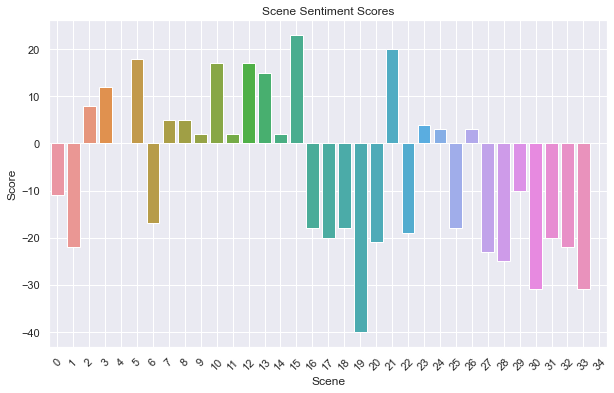

In [132]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Scene', y='Score', data=scene_scores)
ax.grid(True)

ax.set_title('Scene Sentiment Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

### Comments:

At first glance this method seems to be a bit more polarized than the previous one.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would personally use the sentiment analysis method, as it allows for more granularity than the opinion lexicon.